In [4]:
# Data Handling
import csv
import pandas as pd

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# System Information
import platform

# Numeric Computation and Array Handling
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

# Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Print Python version
print("Python Version:", platform.python_version())

Python Version: 3.11.5


In [6]:
# Specifiy CSV file path
file_path = r'C:\Users\kolgi\OneDrive - Western Governors University\d209\medical_clean.csv'

# Open the CSV file and read it using DictReader
with open(file_path, 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)

# Read the CSV file into a pandas DataFrame then open head
df = pd.read_csv(file_path)

In [7]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [9]:
# Find missing values
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [10]:
# Find duplicates
# Check for duplicate rows
duplicates = df.duplicated()

# Display duplicate rows
print("Duplicate rows:")
print(df[duplicates])

Duplicate rows:
Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Job, Children, Age, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, vitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

[0 rows x 50 columns]


In [11]:
#Drop columns irrelevant to the analysis
columns_to_drop = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 
                   'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job',
                  'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item5', 'Item6', 'Item7', 'Item8']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df.info)

<bound method DataFrame.info of           Area  Children  Age    Income    Marital  Gender ReAdmis  \
0     Suburban         1   53  86575.93   Divorced    Male      No   
1        Urban         3   51  46805.99    Married  Female      No   
2     Suburban         3   53  14370.14    Widowed  Female      No   
3     Suburban         0   78  39741.49    Married    Male      No   
4        Rural         1   22   1209.56    Widowed  Female      No   
...        ...       ...  ...       ...        ...     ...     ...   
9995     Urban         2   25  45967.61    Widowed    Male      No   
9996     Urban         4   87  14983.02    Widowed    Male     Yes   
9997     Rural         3   45  65917.81  Separated  Female     Yes   
9998     Rural         3   43  29702.32   Divorced    Male     Yes   
9999     Urban         8   70  62682.63  Separated  Female     Yes   

      VitD_levels  Doc_visits  Full_meals_eaten  ...  Hyperlipidemia BackPain  \
0       19.141466           6                 

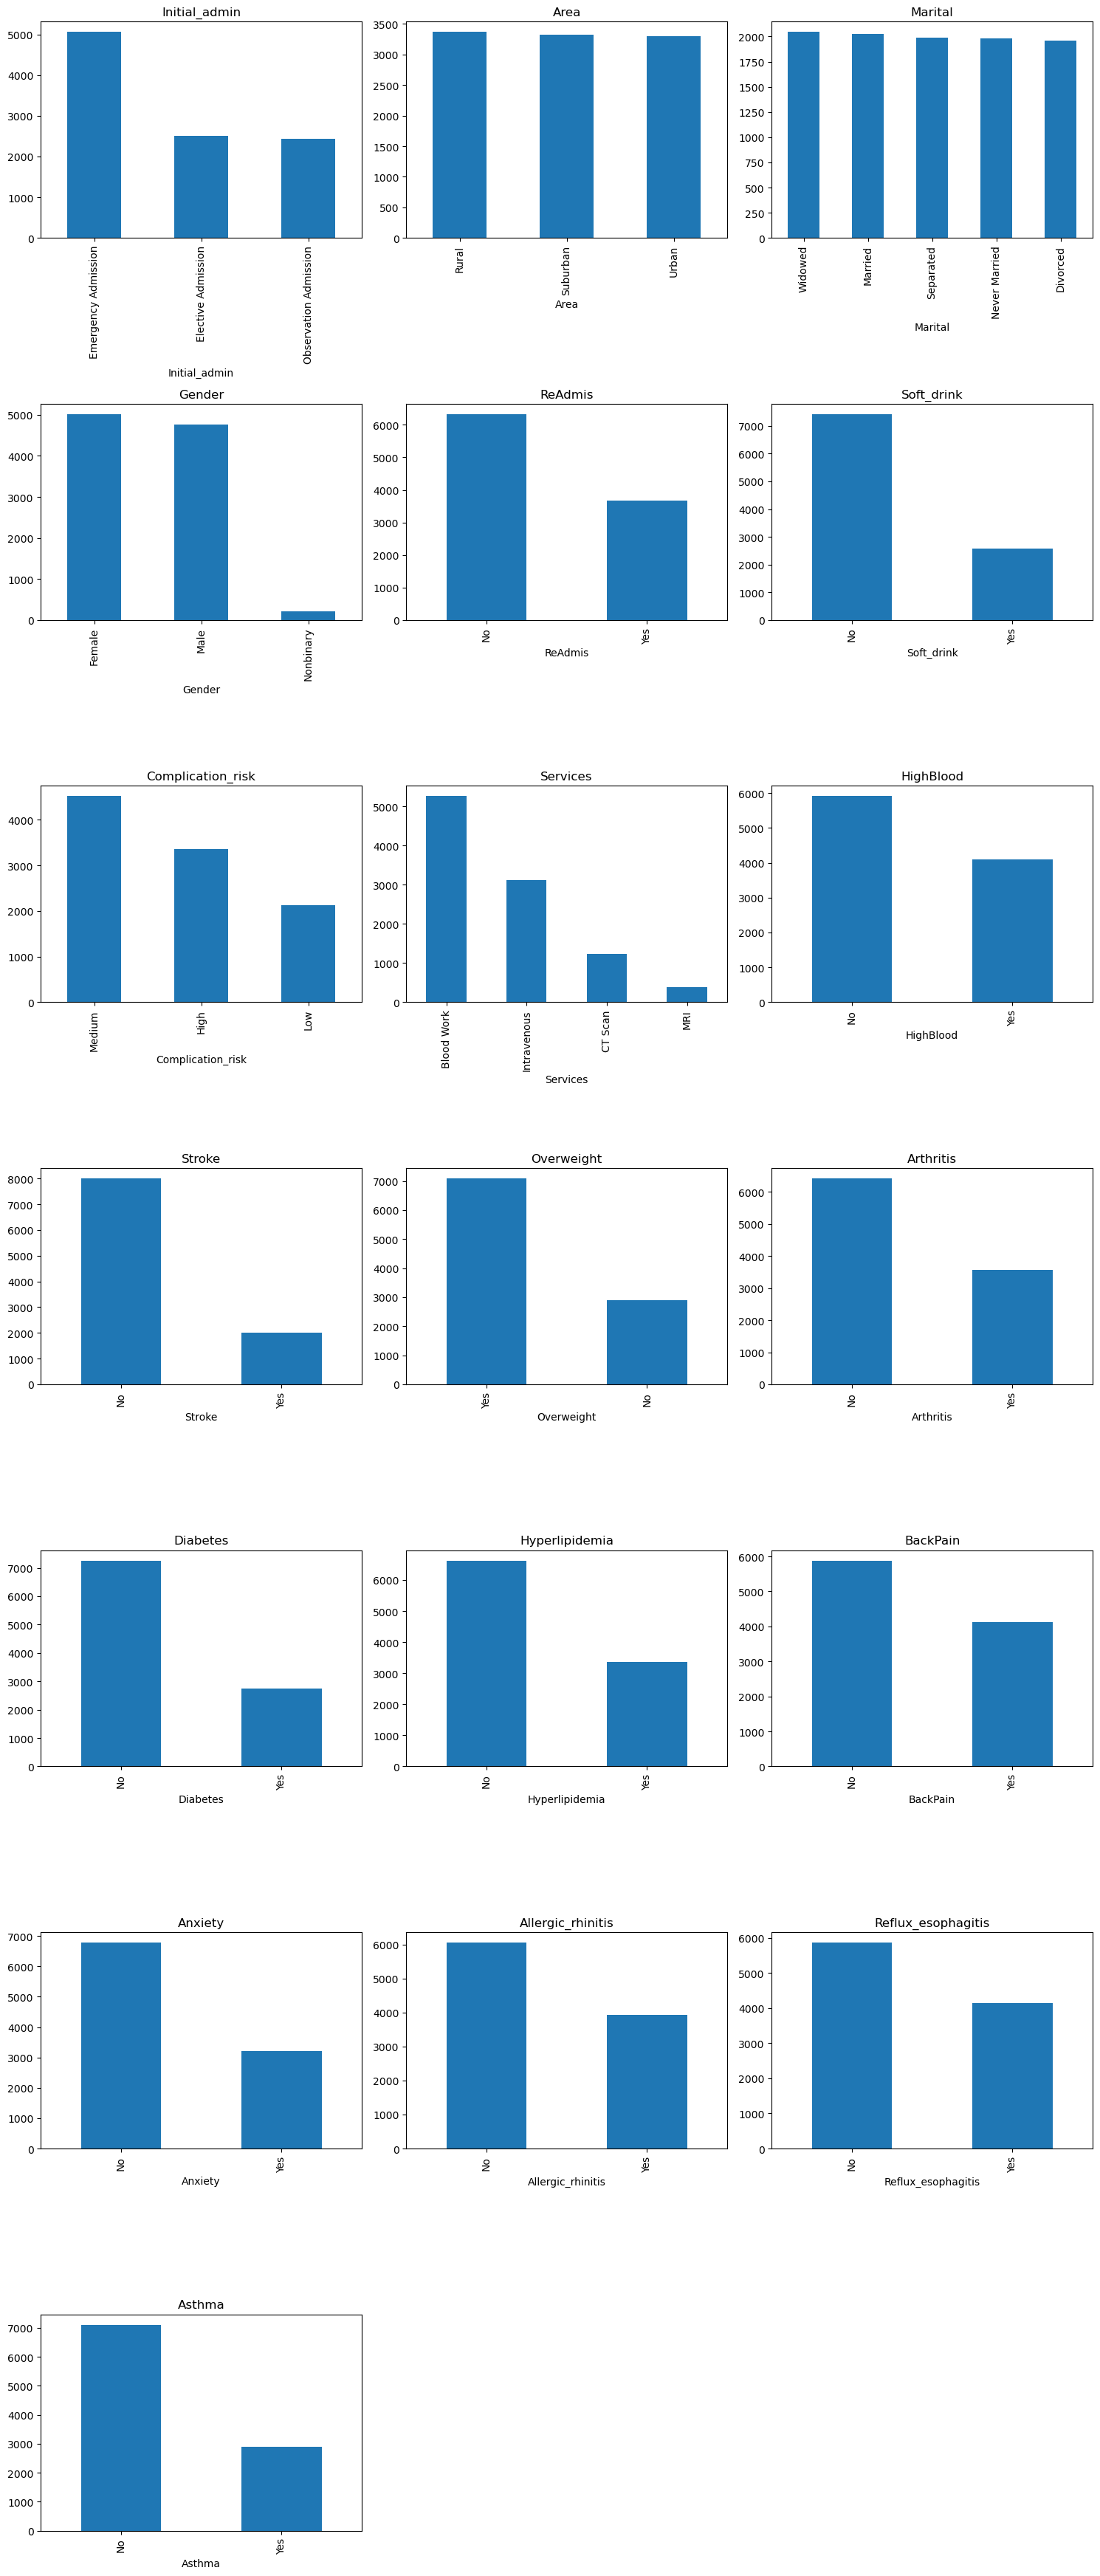

In [12]:
# Visualization only for categorical variables
bar_graphs = ['Initial_admin', 'Area', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 
              'Complication_risk', 'Services', 'HighBlood', 'Stroke', 'Overweight', 
              'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 
              'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

# Calculate the number of rows and columns for the subplots
num_rows = len(bar_graphs) // 3 + (1 if len(bar_graphs) % 3 != 0 else 0)
num_cols = min(3, len(bar_graphs))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

for i, col in enumerate(bar_graphs):
    row_index = i // num_cols
    col_index = i % num_cols
    df[col].value_counts().plot(kind='bar', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)

# Remove any unused subplots
for i in range(len(bar_graphs), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [13]:
# List of categorical columns to be encoded
categorical_columns = [
    'Area', 'Marital', 'Gender', 'ReAdmis',
    'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
    'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
    'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services'
]

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

# Display the updated DataFrame
pd.set_option('display.max_columns', None)
print(df)

      Area  Children  Age    Income  Marital  Gender  ReAdmis  VitD_levels  \
0        1         1   53  86575.93        0       1        0    19.141466   
1        2         3   51  46805.99        1       0        0    18.940352   
2        1         3   53  14370.14        4       0        0    18.057507   
3        1         0   78  39741.49        1       1        0    16.576858   
4        0         1   22   1209.56        4       0        0    17.439069   
...    ...       ...  ...       ...      ...     ...      ...          ...   
9995     2         2   25  45967.61        4       1        0    16.980860   
9996     2         4   87  14983.02        4       1        1    18.177020   
9997     0         3   45  65917.81        3       0        1    17.129070   
9998     0         3   43  29702.32        0       1        1    19.910430   
9999     2         8   70  62682.63        3       0        1    18.388620   

      Doc_visits  Full_meals_eaten  vitD_supp  Soft_drink  Init

In [14]:
# From Elleh (2023)

# Assign to X all the predictor features
X = df.drop(["Initial_admin"], axis=1)
print(X.shape)

# Assign to y to the target variable
y = df["Initial_admin"]
print(y.shape)

(10000, 28)
(10000,)


In [15]:
# From Elleh (2023)

# Initialize SKBest
skbest = SelectKBest(score_func=f_classif, k='all')
X_new = skbest.fit_transform(X, y)
print(X_new.shape)

(10000, 28)


In [16]:
# From Elleh (2023)

# Calculate P-values for X
p_values = pd.DataFrame({'Feature': X.columns, 'p-value': skbest.pvalues_}).sort_values('p-value')
significant_features = p_values[p_values['p-value'] < 0.05]

# Print Features to keep and all P-values
features_to_keep = significant_features['Feature']
print("Features to keep:")
print(features_to_keep)
print("\nP-values:")
print(p_values)

Features to keep:
26           TotalCharge
27    Additional_charges
7            VitD_levels
21     Allergic_rhinitis
14     Complication_risk
5                 Gender
10             vitD_supp
11            Soft_drink
3                 Income
Name: Feature, dtype: object

P-values:
               Feature       p-value
26         TotalCharge  8.197021e-26
27  Additional_charges  1.249457e-03
7          VitD_levels  2.322376e-02
21   Allergic_rhinitis  2.405942e-02
14   Complication_risk  2.531801e-02
5               Gender  3.246141e-02
10           vitD_supp  3.361111e-02
11          Soft_drink  3.966944e-02
3               Income  4.827253e-02
8           Doc_visits  8.847960e-02
6              ReAdmis  1.430189e-01
18      Hyperlipidemia  1.623916e-01
0                 Area  1.975078e-01
2                  Age  3.692870e-01
19            BackPain  4.617586e-01
25        Initial_days  4.810704e-01
9     Full_meals_eaten  4.977408e-01
15          Overweight  5.419380e-01
22  Reflux_eso

In [17]:
# Create a new dataset with the selected features
X_new = X[features_to_keep]

In [18]:
# Check VIF for multicollinearity issues amongst these features

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_new.columns
vif["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

# Print the VIFs
print(vif)

              Feature        VIF
0         TotalCharge   6.546100
1  Additional_charges   4.743249
2         VitD_levels  14.279640
3   Allergic_rhinitis   1.641234
4   Complication_risk   2.570350
5              Gender   1.905121
6           vitD_supp   1.398429
7          Soft_drink   1.343340
8              Income   2.938075


In [19]:
# Drop the 'VitD_levels' column from your dataset since it has a high multicollinearity
X_new = X_new.drop(columns=['VitD_levels'])

# Recalculate the VIF for the updated dataset
vif = pd.DataFrame()
vif["Feature"] = X_new.columns
vif["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

# Print the updated VIF values
print(vif)

              Feature       VIF
0         TotalCharge  4.479221
1  Additional_charges  3.847659
2   Allergic_rhinitis  1.596953
3   Complication_risk  2.264100
4              Gender  1.831346
5           vitD_supp  1.376514
6          Soft_drink  1.320585
7              Income  2.633425


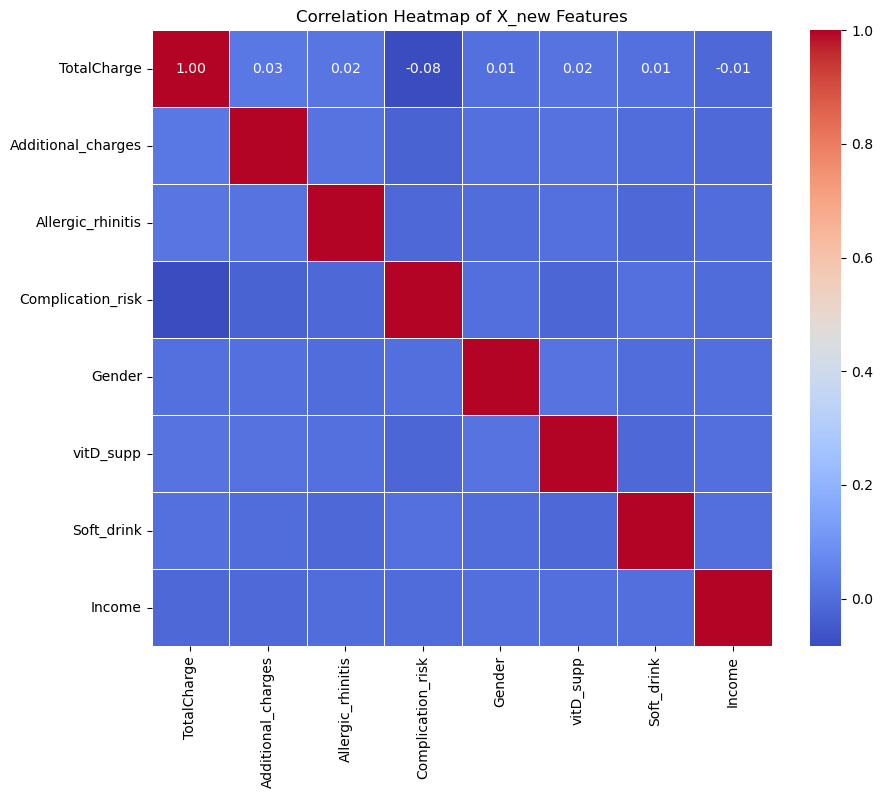

In [20]:
# Calculate the correlation matrix
correlation_matrix = X_new.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of X_new Features')
plt.savefig("corr_matrix.png")
plt.show()

In [21]:
# Save the filtered DataFrame to a CSV file
X_new.to_csv('filtered_med.csv', index=False)

In [22]:
# Scale features but only the numeric columns

# Select only the numeric features
numeric_features = ['TotalCharge', 'Additional_charges', 'vitD_supp', 'Income']
X_numeric = X_new[numeric_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features
X_scaled_numeric = scaler.fit_transform(X_numeric)

# Combine the scaled numeric features with the categorical features
X_categorical = X_new[['Allergic_rhinitis', 'Complication_risk', 'Gender', 'Soft_drink']]
X_scaled = np.concatenate((X_scaled_numeric, X_categorical), axis=1)

print(X_scaled)

[[-0.72718477  0.76500534 -0.63471264 ...  2.          1.
   0.        ]
 [-0.51322759  0.71511362  0.95644465 ...  0.          0.
   0.        ]
 [-1.31998284  0.6986353  -0.63471264 ...  2.          0.
   0.        ]
 ...
 [ 1.35959679  0.35869505 -0.63471264 ...  0.          0.
   1.        ]
 [ 1.06972732 -0.78762373  0.95644465 ...  2.          1.
   0.        ]
 [ 1.18121275 -0.19738374  0.95644465 ...  1.          0.
   0.        ]]


In [23]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=15, stratify=y)

In [24]:
#Save the training and testing sets as csv files
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [25]:
# Define the parameter grid
param_grid = {'n_neighbors': range(1, 30)}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with the KNN classifier, the parameter grid, cross-validation (KFold), and the scoring metric (accuracy)
grid_search = GridSearchCV(knn, param_grid, cv=KFold(n_splits=5), scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

# Get the best KNN model
best_knn = grid_search.best_estimator_

print("Best k:", best_knn)
print("Best Accuracy:", best_score)

Best k: KNeighborsClassifier(n_neighbors=29)
Best Accuracy: 0.501875


In [26]:
# Initialize KNeighborsClassifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=29)

# Fit the best_knn model to the training data
best_knn.fit(X_train, y_train)

# Make predictions on the test data using the best_knn model
y_pred = best_knn.predict(X_test)
y_pred_prob = best_knn.predict_proba(X_test)[:, 1]

print("The predicted classes for the instances in the test set:")
print(y_pred)
print("\nThe predicted probabilities of the positive class for the instances in the test set:")
print(y_pred_prob)

The predicted classes for the instances in the test set:
[1 1 1 ... 1 1 1]

The predicted probabilities of the positive class for the instances in the test set:
[0.51724138 0.44827586 0.5862069  ... 0.62068966 0.34482759 0.48275862]


In [27]:
# Print classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.36      0.10      0.16       501
           1       0.53      0.93      0.68      1012
           2       0.35      0.06      0.10       487

    accuracy                           0.51      2000
   macro avg       0.41      0.37      0.31      2000
weighted avg       0.44      0.51      0.41      2000



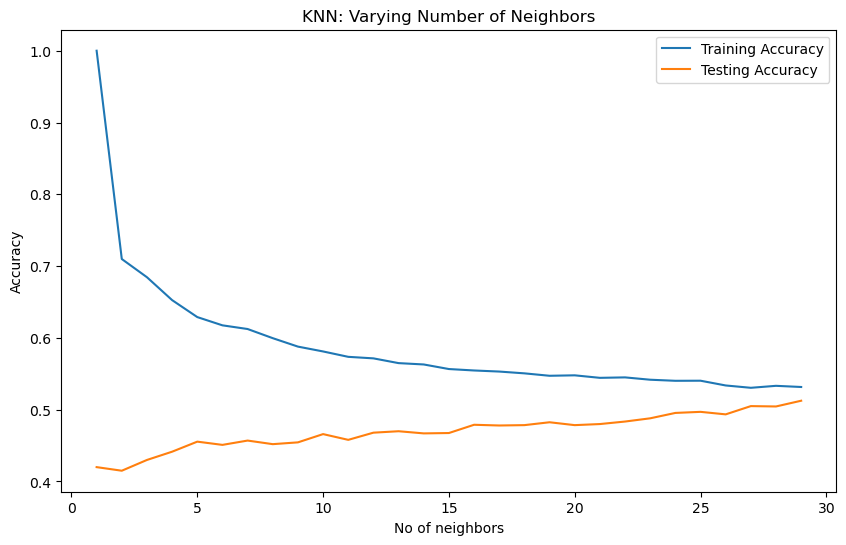

In [28]:
# from Boorman(n.d.)

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 30) 
for neighbor in neighbors:  
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train) 
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(10, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy")
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy")
plt.legend()
plt.xlabel("No of neighbors")
plt.ylabel("Accuracy")
plt.savefig("knn.png")
plt.show()

In [29]:
# Predict the class probabilities for each sample in the test set using the trained KNN model
y_scores = best_knn.predict_proba(X_test)

# Calculate the AUC score for each class individually using the one-vs-rest (OvR) strategy
auc = roc_auc_score(y_test, y_scores, multi_class='ovr')
print("AUC:", auc)

# Reshape y_pred_prob to make it two-dimensional
y_true_binary = label_binarize(y_test, classes=[0, 1, 2]) 
y_pred_prob_reshaped = y_pred_prob.reshape(-1, 1)

# Calculate the ROC AUC score for each class
auc_roc = roc_auc_score(y_true_binary, y_pred_prob_reshaped, average='macro')
print("ROC AUC Score (OvR):", auc_roc)

AUC: 0.559237233200672
ROC AUC Score (OvR): 0.4387961901413984


In [30]:
# Predict the target variable using the fitted KNN model
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Calculate accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate accuracy on testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.531625
Testing Accuracy: 0.5125
